In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re

train_mae_re = r"'Train':\s*([\d\.]+)"
val_mae_re = r"'Validation':\s*([\d\.]+)"
test_mae_re = r"'Test':\s*([\d\.]+)"
lr_re = r"Learning rate\s*:\s*([\d\.]+)"

train_mae = []
val_mae = []
test_mae = []
lr = []

with open('try_FCNN_123.log', 'r') as f:
    text = f.read()

In [2]:
text

"/home/jingdan/apps/miniconda3/envs/dig/lib/python3.11/site-packages/torchani/resources/\n#Params: 15399229\n\n=====Epoch 1\nLearning rate: 0.001\n\nTraining...\n\n\nEvaluating...\n\n\nTesting...\n\n{'Train': 0.7932931358745585, 'Validation': 0.3212846517562866, 'Test': 0.3215232193470001}\nSaving checkpoint...\n\n=====Epoch 2\nLearning rate: 0.00095\n\nTraining...\n\n\nEvaluating...\n\n\nTesting...\n\n{'Train': 0.3039200366878315, 'Validation': 0.2699427306652069, 'Test': 0.26804083585739136}\nSaving checkpoint...\n\n=====Epoch 3\nLearning rate: 0.0009025\n\nTraining...\n\n\nEvaluating...\n\n\nTesting...\n\n{'Train': 0.23902920821227605, 'Validation': 0.14549727737903595, 'Test': 0.1472053974866867}\nSaving checkpoint...\n\n=====Epoch 4\nLearning rate: 0.000857375\n\nTraining...\n\n\nEvaluating...\n\n\nTesting...\n\n{'Train': 0.20459836321802177, 'Validation': 0.11095979064702988, 'Test': 0.11113955080509186}\nSaving checkpoint...\n\n=====Epoch 5\nLearning rate: 0.0008145062499999999\

In [3]:
ev2mev = 1000

train_mae = re.findall(train_mae_re, text)
val_mae = re.findall(val_mae_re, text)
test_mae = re.findall(test_mae_re, text)

train_mae = [float(x)*ev2mev for x in train_mae]
val_mae = [float(x)*ev2mev for x in val_mae]
test_mae = [float(x)*ev2mev for x in test_mae]

In [4]:
lr = re.findall(lr_re, text)

In [5]:
min(test_mae)

31.13383613526821

Text(0.5, 1.0, 'Base Model 2: Learning curve')

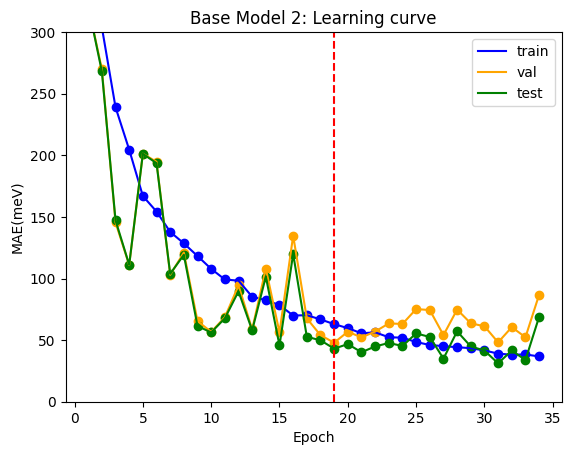

In [6]:
# plot train, val, test MAE

plt.scatter(range(1, len(train_mae)+1), train_mae, c='blue')
plt.scatter(range(1, len(val_mae)+1), val_mae, c='orange')
plt.scatter(range(1, len(test_mae)+1), test_mae, c='green')
plt.plot(range(1, len(train_mae)+1), train_mae, label='train', c='blue')
plt.plot(range(1, len(val_mae)+1), val_mae, label='val', c='orange')
plt.plot(range(1, len(test_mae)+1), test_mae, label='test', c='green')

# mark Epoch 19 is the optimal model
plt.axvline(x=19, color='red', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('MAE(meV)')
plt.ylim(0, 300)
plt.legend()
plt.title('Base Model 2: Learning curve')
